# Introduction

## Import Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import xgboost as xgb

%matplotlib inline
color=sns.color_palette()

sns.set_style('darkgrid')
import warnings
def ignore_warn(*args,**kwargs):
    pass
warnings.warn=ignore_warn

from scipy import stats
from scipy.stats import norm,skew

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
    

## Load Data

In [58]:
train=pd.read_csv('train.csv')
test=pd.read_csv('testy.csv')

print train.shape
print test.shape

(1460, 81)
(1459, 80)


## Statistical Summaries

In [6]:
train.T.head(100)

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,90,20,180,20,20,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
LotFrontage,65.000,80.000,68.000,60.000,84.000,85.000,75.000,NaN,51.000,50.000,...,60.000,78.000,35.000,90.000,62.000,62.000,85.000,66.000,68.000,75.000
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,...,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Pave,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg,...,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,...,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub


In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Looking for Missing Values

### Total Missing value Percentage of training data

In [33]:
miss=train.isnull().sum().sort_values(ascending=False).reset_index()
miss.columns=['Feature','Percent']
miss=miss[miss['Percent']>0]
miss['Percent']=miss['Percent']/train.shape[0]
miss

,Feature,Percent
0,PoolQC,0.995
1,MiscFeature,0.963
2,Alley,0.938
3,Fence,0.808
4,FireplaceQu,0.473
5,LotFrontage,0.177
6,GarageCond,0.055
7,GarageType,0.055
8,GarageYrBlt,0.055
9,GarageFinish,0.055


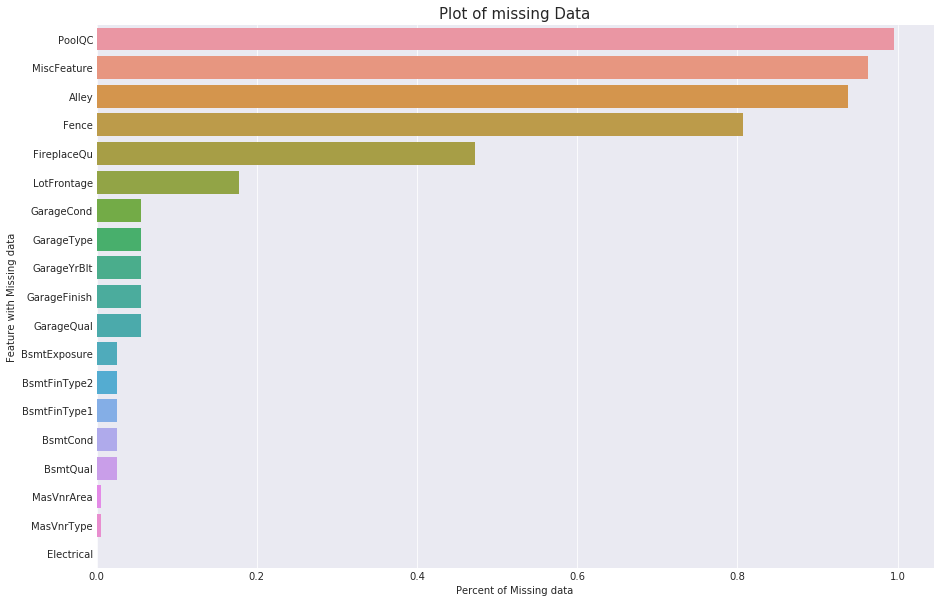

In [29]:
fig,ax=plt.subplots(figsize=(15,10))
sns.barplot('Percent','Feature',data=miss,ax=ax)
plt.xlabel('Percent of Missing data',fontsize=10)
plt.ylabel('Feature with Missing data',fontsize=10)
plt.title('Plot of missing Data',fontsize=15)
plt.show()

### Total Missing value Percentage of test data

In [32]:
miss=test.isnull().sum().sort_values(ascending=False).reset_index()
miss.columns=['Feature','Percent']
miss=miss[miss['Percent']>0]
miss['Percent']=miss['Percent']/train.shape[0]
miss

,Feature,Percent
0,PoolQC,0.997
1,MiscFeature,0.964
2,Alley,0.926
3,Fence,0.801
4,FireplaceQu,0.500
5,LotFrontage,0.155
6,GarageCond,0.053
7,GarageQual,0.053
8,GarageYrBlt,0.053
9,GarageFinish,0.053


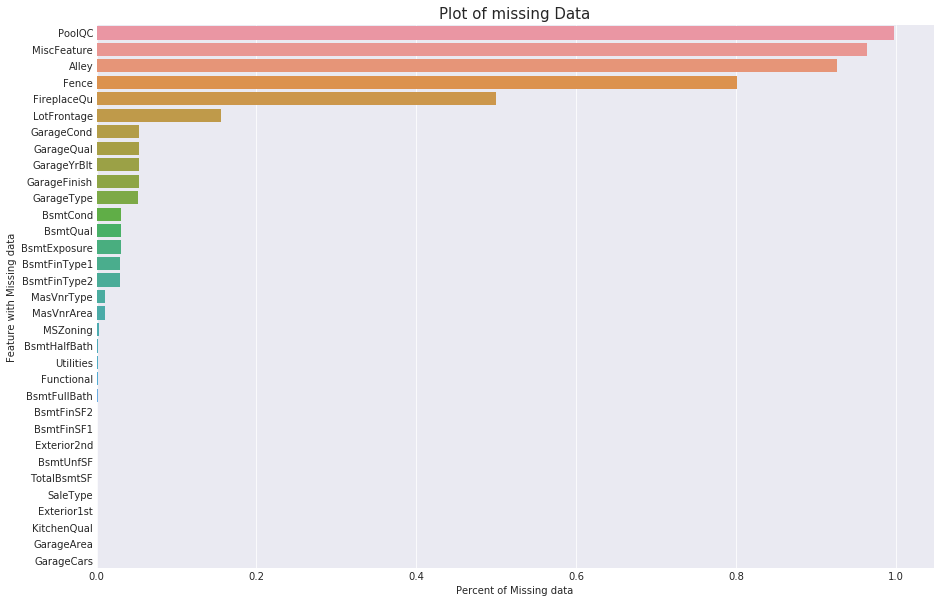

In [31]:
fig,ax=plt.subplots(figsize=(15,10))
sns.barplot('Percent','Feature',data=miss,ax=ax)
plt.xlabel('Percent of Missing data',fontsize=10)
plt.ylabel('Feature with Missing data',fontsize=10)
plt.title('Plot of missing Data',fontsize=15)
plt.show()

# Visualization

## Visualize the target variable


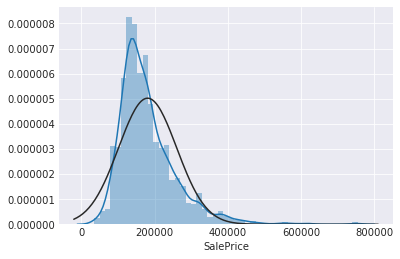

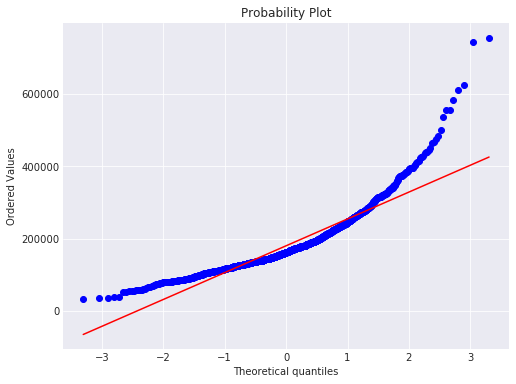

In [60]:
sns.distplot(train['SalePrice'],fit=norm)

fig=plt.figure(figsize=(8,6))
res=stats.probplot(train['SalePrice'],plot=plt)
plt.show()

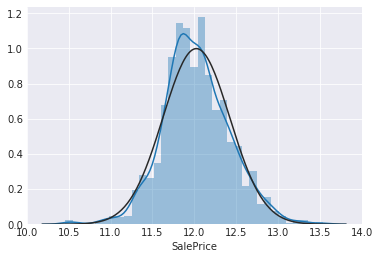

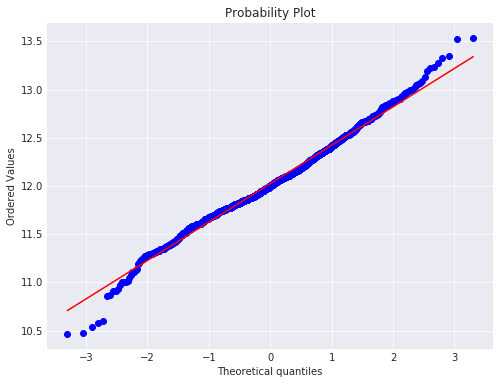

In [61]:
train['SalePrice']=np.log1p(train['SalePrice'])

sns.distplot(train['SalePrice'],fit=norm)

fig=plt.figure(figsize=(8,6))
res=stats.probplot(train['SalePrice'],plot=plt)
plt.show()

## Plotting important Features

In [43]:
#Nows lets see the Important Features
#Step 1 is to convert the categorical variables
for f in train.columns:
    if train[f].dtype=='object':
        lbl=preprocessing.LabelEncoder()
        lbl.fit(list(train[f].values))
        train[f]=lbl.transform(list(train[f].values))

In [44]:
#Step 2: Separate the target variable from train
train_y=train.SalePrice.values
train_x=train.drop(['Id','SalePrice'],axis=1)

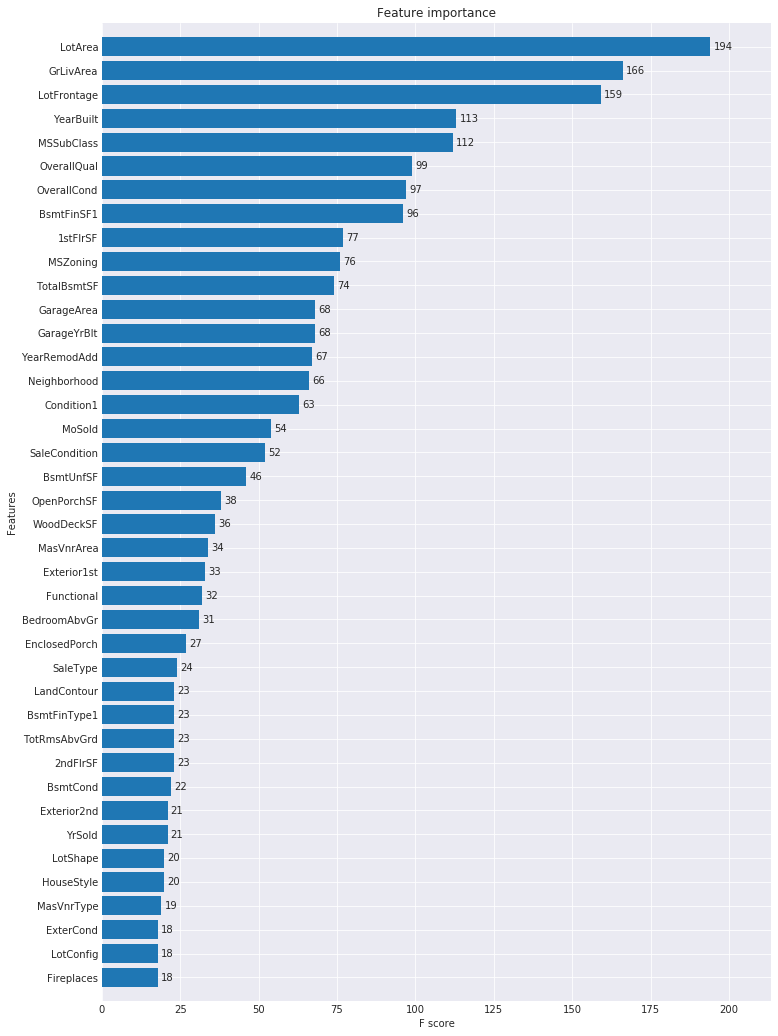

In [47]:
#Step 3 Prepare the xgboost params,dtrain and model
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain=xgb.DMatrix(train_x,train_y,feature_names=train_x.columns.values)
model=xgb.train(dict(xgb_params,silent=0),dtrain,num_boost_round=100)

fig,ax=plt.subplots(figsize=(12,18))
xgb.plot_importance(model,max_num_features=40,height=0.8,ax=ax)
plt.show()

## Lets visualise the important Features

Important features are:  
1.LotArea  
2.GrLivArea  
3.YearBuilt  
4.OverallQual  
5.LotFrontage  



### Visualize LotArea

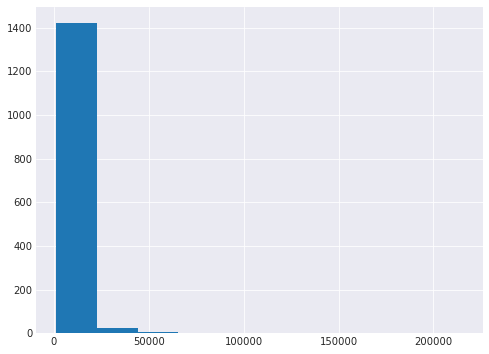

In [62]:
train['LotArea'].hist(bins=10,figsize=(8,6))

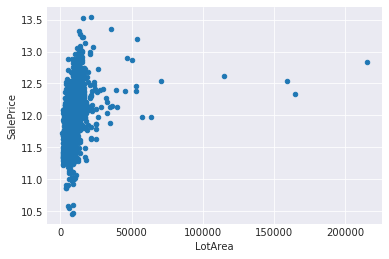

In [63]:
#LotArea vs SalePrice
var='LotArea'
train.plot.scatter(x=var,y='SalePrice')

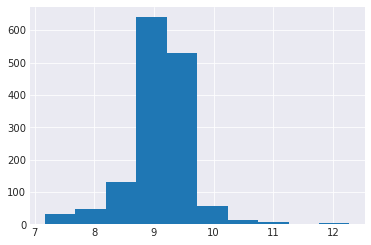

In [64]:
train['LotArea']=np.log1p(train['LotArea'])
x.hist(bins=10)

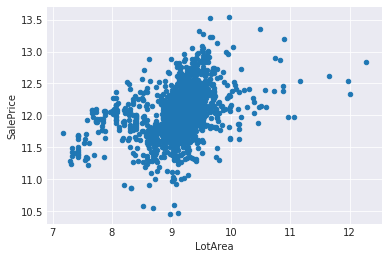

In [65]:
#LotArea vs SalePrice
var='LotArea'
train.plot.scatter(x=var,y='SalePrice')

### GrLivArea

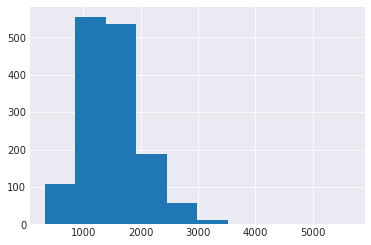

In [66]:
var='GrLivArea'
train[var].hist(bins=10)

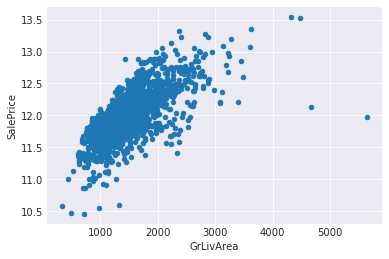

In [67]:
#LotArea vs SalePrice
train.plot.scatter(x=var,y='SalePrice')

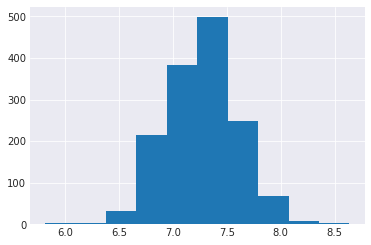

In [68]:
train[var]=np.log1p(train[var])
train[var].hist(bins=10)

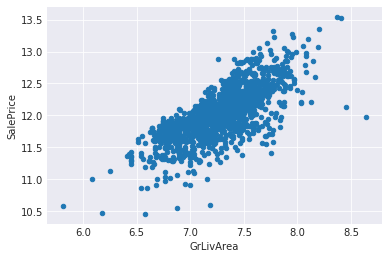

In [69]:
train.plot.scatter(x=var,y='SalePrice')

### LotFrontage

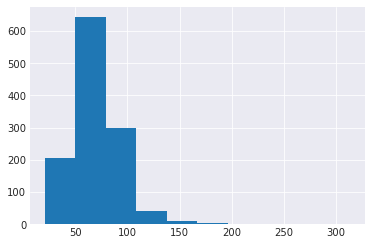

In [70]:
var='LotFrontage'
train[var].hist(bins=10)

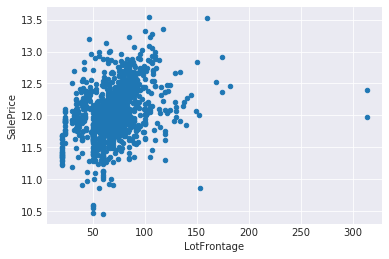

In [71]:
#LotArea vs SalePrice
train.plot.scatter(x=var,y='SalePrice')

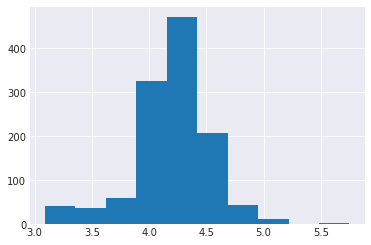

In [72]:
train[var]=np.log1p(train[var])
train[var].hist(bins=10)

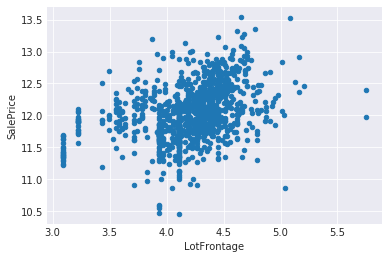

In [73]:
train.plot.scatter(x=var,y='SalePrice')

## Overall Quality

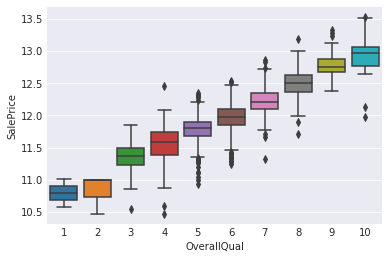

In [74]:
#OverallQual vs SalePrice
var='OverallQual'
sns.boxplot(x=var,y='SalePrice',data=train)

## YearOfBuilt

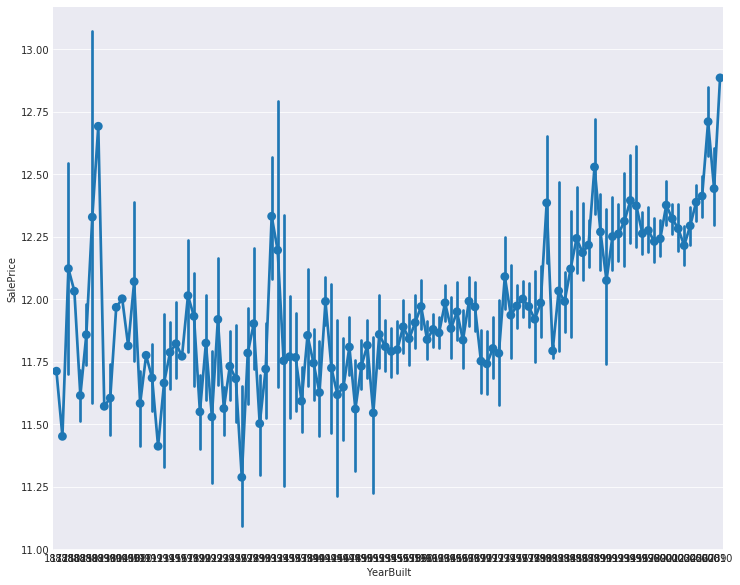

In [78]:
#YearBuilt vs SalePrice
fig,ax=plt.subplots(figsize=(12,10))
var='YearBuilt'
sns.pointplot(x=var,y='SalePrice',data=train,ax=ax)

## Correlation among Features


In [93]:
coer=train.corr()
coer['SalePrice'].sort_values(ascending=False)

SalePrice        1.000
OverallQual      0.791
GrLivArea        0.709
GarageCars       0.640
GarageArea       0.623
TotalBsmtSF      0.614
1stFlrSF         0.606
FullBath         0.561
TotRmsAbvGrd     0.534
YearBuilt        0.523
YearRemodAdd     0.507
GarageYrBlt      0.486
MasVnrArea       0.477
Fireplaces       0.467
BsmtFinSF1       0.386
LotFrontage      0.335
WoodDeckSF       0.324
2ndFlrSF         0.319
OpenPorchSF      0.316
HalfBath         0.284
LotArea          0.264
BsmtFullBath     0.227
BsmtUnfSF        0.214
BedroomAbvGr     0.168
ScreenPorch      0.111
PoolArea         0.092
MoSold           0.046
3SsnPorch        0.045
BsmtFinSF2      -0.011
BsmtHalfBath    -0.017
MiscVal         -0.021
Id              -0.022
LowQualFinSF    -0.026
YrSold          -0.029
OverallCond     -0.078
MSSubClass      -0.084
EnclosedPorch   -0.129
KitchenAbvGr    -0.136
Name: SalePrice, dtype: float64

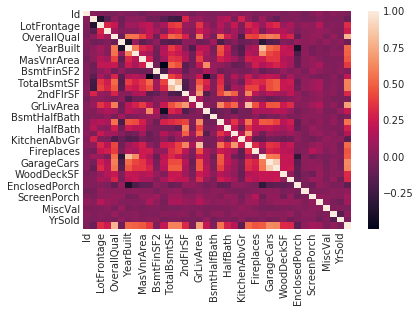

In [98]:
sns.heatmap(coer)